# **CSE564: *Reinforcement Learning Assignment-2***

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

## **Question-5**

Code to solve the Grid-World problem shown in FIgure 3.2 to find the values $v_{\pi}(s)$ for all states for a policy that picks all states with equal probability.

### **Solution**

The following code-block contains the functions to set up the MDP for the Grid-World Problem. Since the problem is completely deterministic, the transition probabilities are set to 1.0 for the action taken and 0.0 for all other actions. The reward function is also deterministic.

Then, we use the Dynamic Programming Policy Evaluation technique to solve the linear equations for $v_{\pi}(s)$ for all states that solve the MDP for the equiprobable random policy. The pseudocode for the DP algorithm is taken from Intro to Reinforcement Learning by Sutton and Barto, Page 75.

In [5]:
def move(state: tuple[int, int], action: int) -> tuple[tuple[int, int], int]:
    """
    Return the next state and reward given the current state and action
    according to the grid-world setup.
    """
    if state == (0, 1):
        return (4, 1), 10
    elif state == (0, 3):
        return (2, 3), 5
    elif action == 0:
        return (max(state[0] - 1, 0), state[1]), -(state[0] == 0)
    elif action == 1:
        return (min(state[0] + 1, 4), state[1]), -(state[0] == 4)
    elif action == 2:
        return (state[0], max(state[1] - 1, 0)), -(state[1] == 0)
    else:
        return (state[0], min(state[1] + 1, 4)), -(state[1] == 4)


def policy(action: int, state: tuple[int, int]) -> float:
    """
    Return the probability of taking an action in a state. In this problem
    setting, the probability is 1/4 for each action from each state.
    """
    return 1 / 4

In [6]:
gamma: float = 0.9
grid = np.random.random((5, 5))

# Use the DP technique for Policy Evaluation to find the value function
for _ in range(250):
    for state in np.ndindex(grid.shape):
        i, j = state
        new = 0
        for action in range(4):
            (next_i, next_j), reward = move(state, action)
            new += policy(action, state) * (reward + gamma * grid[next_i, next_j])
        grid[i, j] = new

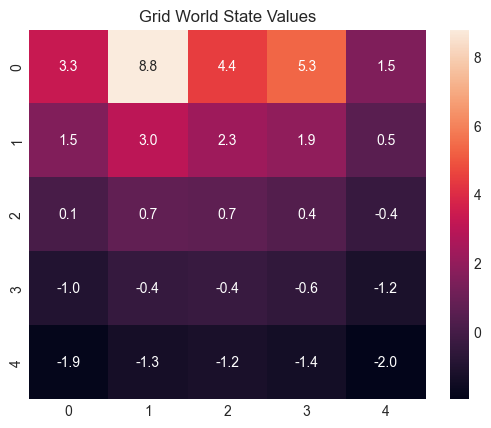

In [7]:
# Visualize the state values
sns.heatmap(grid, annot=True, fmt=".1f")
plt.title("Grid World State Values")
plt.show()

## **Question-7**

Code to solve the Grid-World problem shown in Figure 3.2 to find the values $v_{*}(s)$ for all states, along with an optimal policy $\pi_{*}$.

### **Solution**

The following code-block contains the functions to set up the MDP for the Grid-World Problem. Since the problem is completely deterministic, the transition probabilities are set to 1.0 for the action taken and 0.0 for all other actions. The reward function is also deterministic.

Then, we use the Dynamic Programming Policy Iteration technique to solve the non-linear equations for $v_{*}(s)$ for all states by findind the optimum. We start from a random policy, and improve to the optimal policy. The pseudocode for the DP algorithm is taken from Intro to Reinforcement Learning by Sutton and Barto, Page 80.

In [8]:
gamma: float = 0.9
grid = np.random.random((5, 5))
optimal = np.random.random((5, 5))
policy = lambda action, state: action == optimal[state[0], state[1]]

# Use the DP technique for Policy Iteration to find the optimal policy
while True:
    # Policy Evaluation
    for _ in range(250):
        for state in np.ndindex(grid.shape):
            i, j = state
            new = 0
            for action in range(4):
                (next_i, next_j), reward = move(state, action)
                new += policy(action, state) * (reward + gamma * grid[next_i, next_j])
            grid[i, j] = new

    # Policy Improvement
    stable = True
    for state in np.ndindex(grid.shape):
        i, j = state
        old = optimal[i, j]
        # Find the optimal policy for the state
        optimal[i, j] = np.argmax([
            sum(policy(action, state) * (reward + gamma * grid[next_i, next_j])
            for action in range(4))
            for (next_i, next_j), reward in [move(state, action) for action in range(4)]
        ])
        
        if old != optimal[i, j]:
            stable = False

    if stable: break

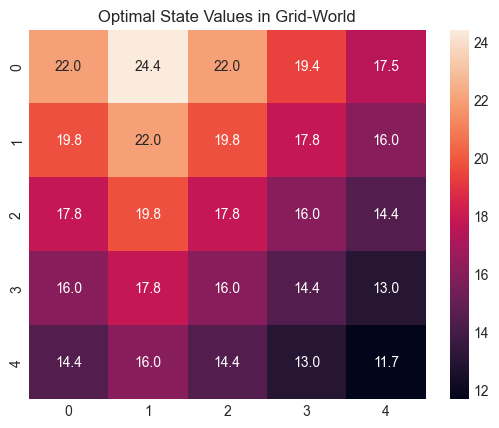

In [9]:
# Visualize the state values
sns.heatmap(grid, annot=True, fmt=".1f")
plt.title("Optimal State Values in Grid-World")
plt.show()

## **Question-9**

Code to solve the Grid-World problem shown in Example 4.1 using Policy Iteration and Value Iteration. This Grid-World problem is an episodic task with 2 terminal states. The reward of all transitions is -1.

### **Solution**

The following code-block contains the functions to set up the MDP for the Grid-World Problem. Since the problem is completely deterministic, the transition probabilities are set to 1.0 for the action taken and 0.0 for all other actions. The reward function is also deterministic, returning -1 for all transitions.

First, we use the DP technique for Policy Evaluation to generate the final value function for the given equiprobable random policy.
Then, we start from an arbitrary policy to solve the problem using full Policy Iteration and Value Iteration.

In [10]:
def move(state: tuple[int, int], action: int) -> tuple[tuple[int, int], int]:
    """
    Return the next state and reward given the current state and action
    according to the grid-world setup.
    """
    if action == 0:
        return (max(state[0] - 1, 0), state[1]), -1
    elif action == 1:
        return (min(state[0] + 1, 3), state[1]), -1
    elif action == 2:
        return (state[0], max(state[1] - 1, 0)), -1
    else:
        return (state[0], min(state[1] + 1, 3)), -1


def policy(action: int, state: tuple[int, int]) -> float:
    """
    Return the probability of taking an action in a state. In this problem
    setting, the probability is 1/4 for each action from each state.
    """
    return 1 / 4

In [11]:
gamma: float = 1.0
grid = np.zeros((4, 4))

# Use the DP technique for Policy Evaluation to find the value function
for _ in range(250):
    for state in np.ndindex(grid.shape):
        i, j = state
        if (i == 0 and j == 0) or (i == 3 and j == 3):
            continue
        new = 0
        for action in range(4):
            (next_i, next_j), reward = move(state, action)
            new += policy(action, state) * (reward + gamma * grid[next_i, next_j])
        grid[i, j] = new
        print(i, j, grid[i, j], end="\r")

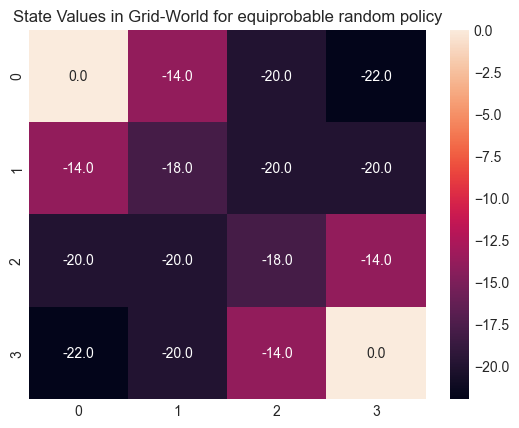

In [12]:
# Visualize the state values
sns.heatmap(grid, annot=True, fmt=".1f")
plt.title("State Values in Grid-World for equiprobable random policy")
plt.show()

### **Solution using Policy Iteration**

In [13]:
gamma: float = 1.0
grid = np.zeros((4, 4))
optimal = np.zeros((4, 4), dtype=int)
policy = lambda action, state: action == optimal[state[0], state[1]]

# Use the DP technique for Policy Iteration to find the optimal policy
while True:
    # Policy Evaluation
    for _ in range(250):
        for state in np.ndindex(grid.shape):
            i, j = state
            if (i == 0 and j == 0) or (i == 3 and j == 3):
                continue
            new = 0
            for action in range(4):
                (next_i, next_j), reward = move(state, action)
                new += policy(action, state) * (reward + gamma * grid[next_i, next_j])
            grid[i, j] = new

    print(grid)

    # Policy Improvement
    stable = True
    for state in np.ndindex(grid.shape):
        i, j = state
        if (i == 0 and j == 0) or (i == 3 and j == 3):
            continue
        old = optimal[i, j]
        # Find the optimal policy for the state
        optimal[i, j] = np.argmax([
            sum(policy(action, state) * (reward + gamma * grid[next_i, next_j])
            for action in range(4))
            for (next_i, next_j), reward in [move(state, action) for action in range(4)]
        ])
        
        if old != optimal[i, j]:
            stable = False

    print(optimal)

    if stable: break

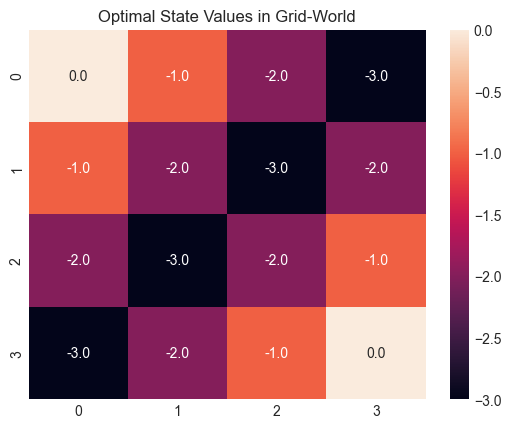

In [14]:
# Visualize the state values
sns.heatmap(grid, annot=True, fmt=".1f")
plt.title("Optimal State Values in Grid-World")
plt.show()

### **Solution using Value Iteration**

In [15]:
gamma: float = 1.0
grid = np.zeros((4, 4))

# Use the DP technique for Value Iteration to find the optimal policy
for iters in range(250):
    for state in np.ndindex(grid.shape):
        i, j = state
        if (i == 0 and j == 0) or (i == 3 and j == 3):
            continue
        new = -np.inf
        for action in range(4):
            (next_i, next_j), reward = move(state, action)
            new = max(new, reward + gamma * grid[next_i, next_j])
        grid[i, j] = new
    
    if iters % 10 == 0: print(grid, end="\r")

optimal = np.zeros((4, 4), dtype=int)
policy = lambda action, state: action == optimal[state[0], state[1]]

for state in np.ndindex(grid.shape):
    i, j = state
    if (i == 0 and j == 0) or (i == 3 and j == 3):
        continue
    # Find the optimal policy for the state
    optimal[i, j] = np.argmax([
        sum(policy(action, state) * (reward + gamma * grid[next_i, next_j])
        for action in range(4))
        for (next_i, next_j), reward in [move(state, action) for action in range(4)]
    ])

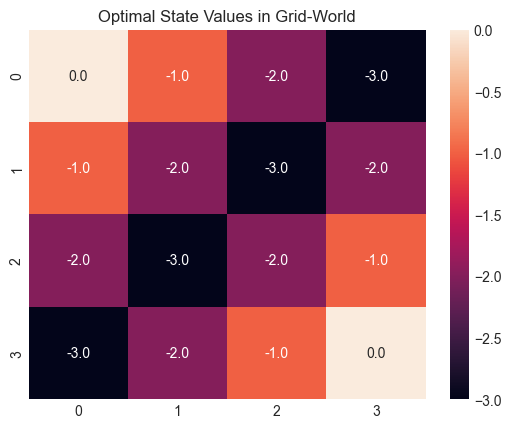

In [16]:
# Visualize the state values
sns.heatmap(grid, annot=True, fmt=".1f")
plt.title("Optimal State Values in Grid-World")
plt.show()

## **Question-10**

### **Solution**

The following code block contains helper functions required to solve Jack's rental problem. We work with $20 \times 20 = 400$ states. The state is represented by the number of cars at each location at the end of the day. The action is the number of cars to move from location 1 to location 2. The reward is the sum of the rental income and the cost of moving the cars.

The only challenge is to calculate the expected value of the next state. For that, we use the poisson distribution over the given rentals and returns and find the probabilities ot weigh each possible next state by. The calculation of the full expectation makes the code computationally complex.

In [51]:
def poisson(lambda_: float, n: int) -> float:
    """
    :param _lambda: lambda parameter of poisson distribution, i.e. rate
    :param n: the number of occurrences
    :return: probability that n occurrences will happen for the given rate
    """
    return (lambda_ ** n) * np.exp(-lambda_) / np.math.factorial(n)


def value(state: tuple[int], action: int) -> float:
    """
    Compute value given a state and an action for the state following the formula:
    sum s', r of p(s',r | s, a)[r + gamma*V(s')]
    """
    
    def probability(curr: int, target: int, lambda_: float, sum_prob: float) -> float:
        return 1 - sum_prob if curr == target else poisson(lambda_, curr)
    
    def sum_prob(curr: int, target: int, p: float) -> float:
        return p if curr != target else 0

    s1, s2 = state[0] - action, state[1] + action
    cost = COST_PER_CAR * abs(action)
    total_value = 0
    
    sum_prob_i = 0
    for i in range(s1 + 1):
        p_i = probability(i, s1, LAMBDA_REQUEST_1, sum_prob_i)
        sum_prob_i += sum_prob(i, s1, p_i)
        reward_i = i * REWARD_PER_CAR

        sum_prob_j = 0
        for j in range(s2 + 1):
            p_j = probability(j, s2, LAMBDA_REQUEST_2, sum_prob_j)
            sum_prob_j += sum_prob(j, s2, p_j)
            reward_j = j * REWARD_PER_CAR
            reward = reward_i + reward_j - cost

            sum_prob_k = 0
            for k in range(MAX_CARS + i - s1 + 1):
                p_k = probability(k, MAX_CARS + i - s1, LAMBDA_RETURN_1, sum_prob_k)
                sum_prob_k += sum_prob(k, MAX_CARS + i - s1, p_k)

                sum_prob_l = 0
                for l in range(MAX_CARS + j - s2 + 1):
                    p_l = probability(l, MAX_CARS + j - s2, LAMBDA_RETURN_2, sum_prob_l)
                    sum_prob_l += sum_prob(l, MAX_CARS + j - s2, p_l)

                    total_value += p_i * p_j * p_k * p_l * (reward + gamma * V[s1-i+k, s2-j+l])

    return total_value


def action_set(state) -> list[int]:
    """
    Get the set of possible actions in a state, A(s) for a given state
    """
    actions = []
    s1, s2 = state
    # Discard actions that would make the number of car negative or higher than max in at least one of the locations
    for action in range(-MAX_MOVE, MAX_MOVE + 1):
        if s1 - action < 0 or s1 - action > MAX_CARS or s2 + action < 0 or s2 + action > MAX_CARS: continue
        actions.append(action)
    return actions


def plot_policy(policy: np.ndarray) -> None:
    plt.figure(figsize=(5, 5))
    sns.heatmap(policy, vmin=-MAX_MOVE, vmax=MAX_MOVE)
    plt.xlabel("Cars at second location")
    plt.ylabel("Cars at first location")


def plot_values(V: np.ndarray) -> None:
    ax = plt.axes(projection="3d")
    X, Y = np.meshgrid(np.arange(0, MAX_CARS + 1), np.arange(0, MAX_CARS + 1))
    ax.plot_surface(X, Y, V)
    plt.title("Values")

In [19]:
MAX_CARS: int = 20
MAX_MOVE: int = 5

REWARD_PER_CAR: float = 10.0
COST_PER_SLOT_NIGHT: float = 4.0
COST_PER_CAR: float = 2.0

# self.theta = 0.01
tol: float = 0.01

gamma: float = 0.9

LAMBDA_REQUEST_1: float = 3.0
LAMBDA_REQUEST_2: float = 4.0
LAMBDA_RETURN_1: float = 3.0
LAMBDA_RETURN_2: float = 2.0

states = [(i, j) for i in range(MAX_CARS + 1) for j in range(MAX_CARS + 1)]
V = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
optimal = np.zeros((MAX_CARS + 1, MAX_CARS + 1), dtype=int)

In [40]:
while True:
    # Policy Evaluation
    while True:
        delta = 0.0
        for state in states:
            old_value = V[state]
            V[state] = value(state, optimal[state])
            delta = max(delta, abs(old_value - V[state]))
            print(state, V[state], delta, end="\r")
        if delta < tol: break

    # Policy improvement
    stable = True
    for state in states:
        old_action = optimal[state]
        values = {action: value(state, action) for action in action_set(state)}
        optimal[state] = np.argmax(list(values.values()))
        if old_action != optimal[state]:
            stable = False
        print(state, optimal[state], end="\r")

    if stable: break

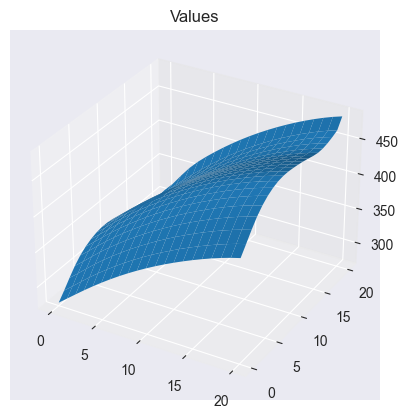

In [52]:
plot_values(V)